In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import recall_score, precision_score
from collections import Counter

Получим и загрузим данные

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/artificialflesh/training_projects/master/05_features_n_models/05_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалим все пропущенные значения и категориальные переменные

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
categorical_features = ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
categorical_features

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [6]:
df.drop(columns=categorical_features, inplace=True)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250
886,887,0,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
889,890,1,26.0,0,0,30.0000


Обучим модель

In [10]:
X = df.drop('Survived', axis=1)

In [11]:
y = df['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(max_iter=1000)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
model.score(X_train, y_train)

0.7005253940455342

In [16]:
model.score(X_test, y_test)

0.6993006993006993

In [17]:
pred = model.predict(X_test)

In [18]:
recall_score(y_test, pred)

0.32142857142857145

In [19]:
precision_score(y_test, pred)

0.782608695652174

Снова загрузим полные данные

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/artificialflesh/training_projects/master/05_features_n_models/05_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Посчитаем, какой процент данных будет потерян, если просто удалить пропуски

In [22]:
data.isna().sum().sum() / data.shape[0]

0.9719416386083053

Cabin в дальнейшем использовать не будем, поэтому посчитаем без него

In [23]:
data.drop(columns='Cabin', inplace=True)

In [24]:
data.isna().sum().sum() / data.shape[0]

0.20089786756453423

In [25]:
data['Ticket'].count()

891

In [26]:
len(data['Ticket'].unique())

681

Дальше заполним пропуски, где необходимо, и удалим признаки, которые логически не нужны для построения модели: PassengerId - айди важен для идентификации пассажира, но при определения выживаемости ничем не поможет, Name - в целом не нужен, но для начала извлечем из него полезную для определения возраста информацию, Ticket и Fare - сомневаюсь, что номер билета помог кому-то выжить, а из данных в этих столбцах можно выделить определенные совпадения, намекающие на групповые билеты, что может только запутать модель, но пока более глубокий анализ на них проводить не будем, удалим, Cabin - отсутствует 77% данных этого признака, не вижу причин работать с оставшимися, Embarked - вряд ли порт отплытия пригодится при построении модели, но может пригодится в заполнении пропусков возраста, используем и удалим.

Перейдем к заполнению пропусков

Для начала заберем полезную информацию из имен

In [27]:
all_names = ' '.join(data['Name'])
words = all_names.split()
word_counts = Counter(words)
sorted_word_counts = word_counts.most_common()

In [28]:
title_list = []

for word, count in sorted_word_counts:
    if '.' in word and len(word) > 2:
        print(word, ':', count)
        title_list.append(word)

Mr. : 517
Miss. : 182
Mrs. : 125
Master. : 40
Dr. : 7
Rev. : 6
Major. : 2
Mlle. : 2
Col. : 2
Don. : 1
Mme. : 1
Ms. : 1
Lady. : 1
Sir. : 1
Capt. : 1
Countess. : 1
Jonkheer. : 1


In [29]:
def extract_title(name):
    for title in title_list:
        if title in name:
            return title
    return ''

In [30]:
data['Title'] = data['Name'].apply(extract_title)

In [31]:
unknown_age_titles = data['Title'].loc[ data['Age'].isna() ].unique()

Посмотрим на распредление возрастов на различных визуализациях и с разными категориями обращений, классов и портов

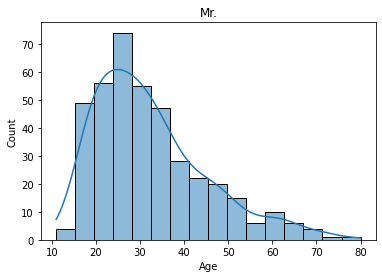

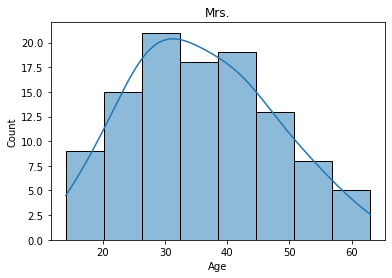

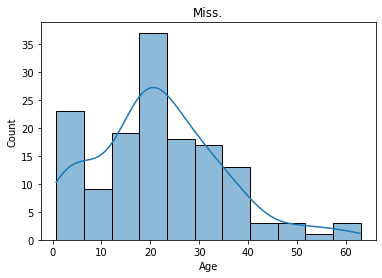

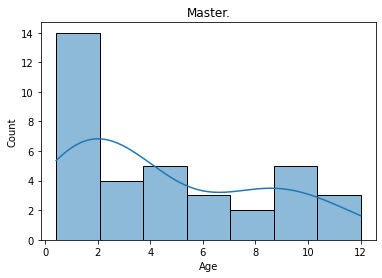

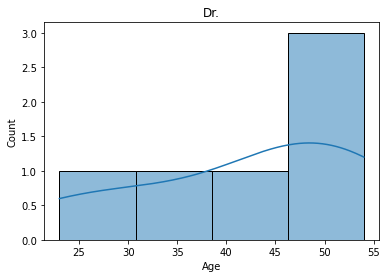

In [32]:
for title in unknown_age_titles:
    sns.histplot(data=data.loc[ data['Title'] == title ], x='Age', kde=True)
    plt.title(title)
    plt.show()

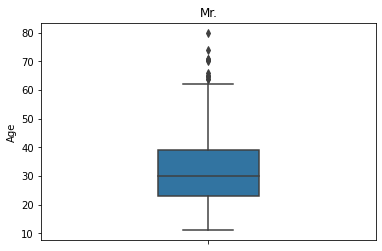

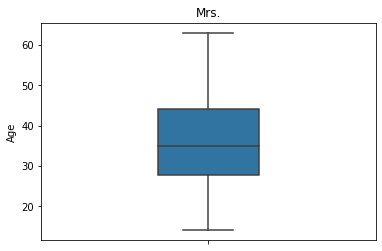

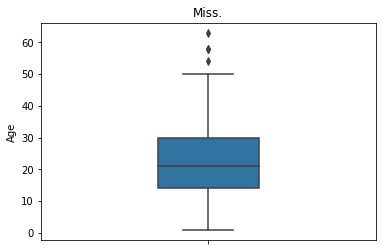

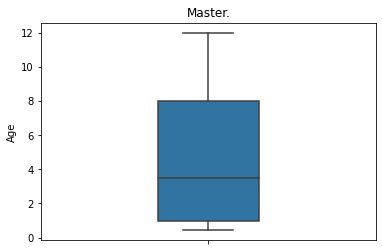

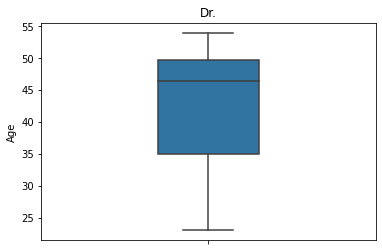

In [33]:
for title in unknown_age_titles:
    sns.boxplot(data=data.loc[ data['Title'] == title ], y='Age', width=0.3)
    plt.title(title)
    plt.show()

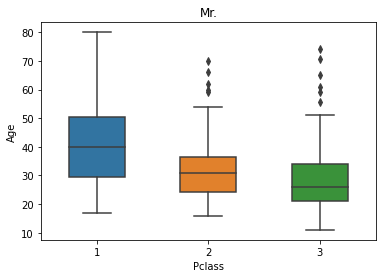

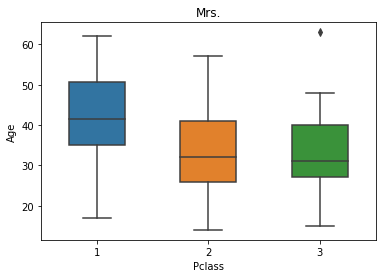

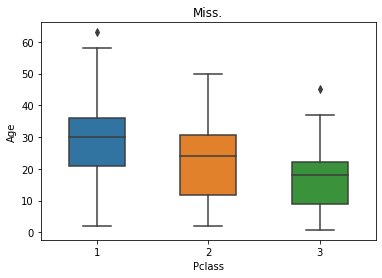

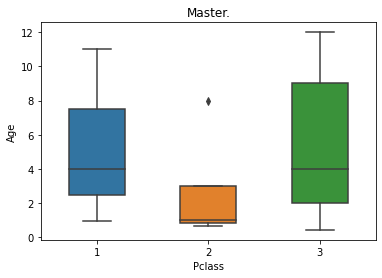

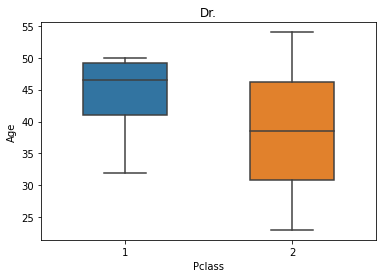

In [34]:
for title in unknown_age_titles:
    sns.boxplot(data=data.loc[ data['Title'] == title ], x='Pclass', y='Age', width=0.5)
    plt.title(title)
    plt.show()

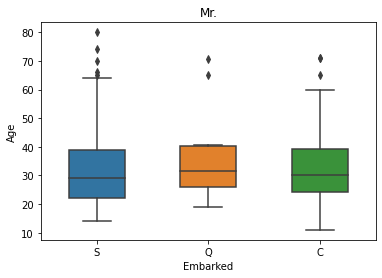

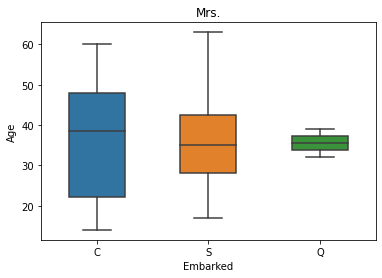

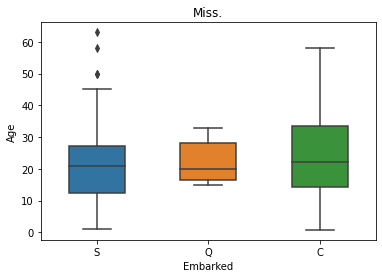

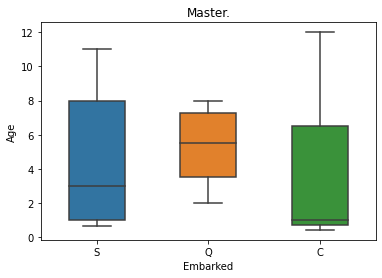

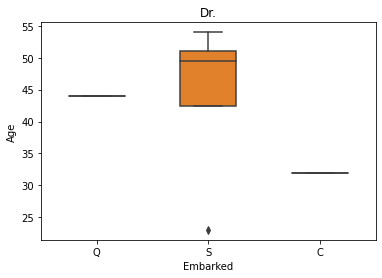

In [35]:
for title in unknown_age_titles:
    sns.boxplot(data=data.loc[ data['Title'] == title ], x='Embarked', y='Age', width=0.5)
    plt.title(title)
    plt.show()

В некоторой степени есть различия в распределении возраста для каждой из категорий, поэтому для заполнения возраста будем учитывать все эти признаки. Часто встречаются выбросы, естественные, без аномальных значений, поэтому для заполнения используем не среднюю, а медиану, поскольку она более устойчива к выбросам

In [36]:
unknown_age = data.loc[ data['Age'].isna() ]
known_age = data.loc[ ~data['Age'].isna() ]

In [37]:
ports = data['Embarked'].dropna().unique()
pclasses = data['Pclass'].dropna().unique()

In [38]:
for title in unknown_age_titles:
    for port in ports:
        for pclass in pclasses:
            median = known_age['Age'].loc[ (known_age['Title'] == title) & \
                                           (known_age['Embarked'] == port) & \
                                           (known_age['Pclass'] == pclass) ].median()
            fillna = unknown_age['Age'].loc[ (unknown_age['Title'] == title) & \
                                             (unknown_age['Embarked'] == port) & \
                                             (unknown_age['Pclass'] == pclass) ].fillna(median)
            unknown_age.loc[ (unknown_age['Title'] == title) & \
                             (unknown_age['Embarked'] == port) & \
                             (unknown_age['Pclass'] == pclass), 'Age'] = fillna

In [39]:
unknown_age.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

Пропуски заполнены

Объединим все опять в один датафрейм

In [40]:
data = pd.concat([known_age, unknown_age])
data = data.sort_values(by='PassengerId')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr.


Теперь избавимся от лишних столбцов

In [41]:
drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked', 'Title']
data.drop(columns=drop, inplace=True)

Еще раз посмотрим на выбросы в возрасте с помощью боксплот, но уже без разбивок по другим признакам

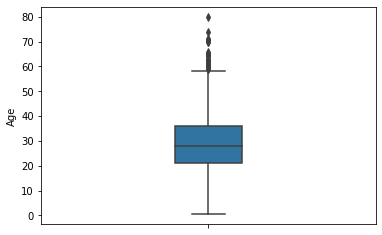

In [42]:
sns.boxplot(data=data, y='Age', width=0.2)
plt.show()

Выбросы — возраст от 59 до 80 лет, делать с ними ничего не будем

Переведем категориальные переменные в цифровые значения

In [43]:
categorical_features = ['Pclass', 'Sex']

In [44]:
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [45]:
data.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,0,1,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,1,0
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,0,1,1


In [46]:
X = data.drop('Survived', axis=1)

In [47]:
y = data['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
model.score(X_train, y_train)

0.8019662921348315

In [51]:
model.score(X_test, y_test)

0.8268156424581006

In [52]:
pred = model.predict(X_test)

In [53]:
recall_score(y_test, pred)

0.7297297297297297

In [54]:
precision_score(y_test, pred)

0.8307692307692308

Итоги:

Для подготовки данных из имен были извлечены обращения (титулы), которые могут явно указывать на возраст (титул Master присутствует только у детей мужского пола) или могут помочь с его определением в сочетании с иными признаками. Пропуски возраста заполнены более устойчивыми к выбросам медианами по разным пассажирским классам и портам отбытия. Такие группы были взяты с учетом того, что разный класс себе могут позволить люди разных возрастных групп, а в некоторых городах может увеличиваться скопление мигрантов из других стран, у которых тоже могут быть определенные возрастные сходства.

Исключены определенные признаки, описанные подробнее ранее, которые могут не оказывать никакого влияния на выживаемость или в которых содержатся запутанные сведения (например, Ticker и Fare).

Данные проверены на выбросы, их я решил оставить, поскольку возраст людей вполне может влиять и на выживаемость.

Метрики качества значительно изменились после преобразования данных:
Accuracy выросла с 70% до 83% на тесте, Recall — с 32% до 73%, Precision — с 78% до 83%.

Считаю, что для построения моделей машинного обучения всегда нужно, как минимум, исследовать данные, и, при необходимости, производить их преобразования для повышения качества работы модели, как произошло и при работе с этим датасетом. На действительно больших данных процесс их исследования будет отличаться, поскольку с такими небольшими датасетами есть возможность изучить данные чуть более детально даже в ручную. Полагаю, что на больших данных возможно изучить только определенные срезы и по ним делать вывод о всем датасете.

P.S. Изначально был план использовать модель линейной регрессии для заполнения пропусков возраста, но столкнулся с тем, что добился максимального значения метрики R2 43% на трейне и 40% на тесте, никакими способами улучшить эти показатели не смог. Ниже прикладываю попытку с наилучшим результатом по этой метрике.

Возможно, что-то сделано неправильно? Возможно ли в этом датасете заполнить пропуски возраста линейной регрессией?

In [55]:
data = pd.read_csv('https://raw.githubusercontent.com/artificialflesh/training_projects/master/05_features_n_models/05_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
data['Title'] = data['Name'].apply(extract_title)

In [58]:
drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked', 'Cabin']
data.drop(columns=drop, inplace=True)

In [59]:
categorical_features = ['Pclass', 'Sex', 'Title']

In [60]:
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [61]:
data.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Title_Col.,Title_Countess.,Title_Don.,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
0,0,22.0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,35.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
unknown_age = data.loc[ data['Age'].isna() ]

In [63]:
known_age = data.loc[ ~data['Age'].isna() ]

In [64]:
X = known_age.drop('Age', axis=1)

In [65]:
y = known_age['Age']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
model.score(X_train, y_train)

0.43579514872372216

In [69]:
model.score(X_test, y_test)

0.402727371887863

In [70]:
model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [71]:
model.score(X_train, y_train)

0.43568886691462927

In [72]:
model.score(X_test, y_test)

-7.861413997057769e+24

In [73]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)
X_test_poly = poly.transform(X_test)

In [74]:
model.score(X_train_poly, y_train)

0.49950596972309547

In [75]:
model.score(X_test_poly, y_test)

-2.014092334039917e+19

In [76]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [77]:
lasso_reg.score(X_train, y_train)

0.4121343390783081

In [78]:
lasso_reg.score(X_test, y_test)

0.4066192052336257

In [79]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [80]:
ridge_reg.score(X_train, y_train)

0.43564837560497305

In [81]:
ridge_reg.score(X_test, y_test)

0.4067013884943729